#Coding Assignment U3A1
SVM Program - Breast Cancer
Author: Rahul Krishnan
Ref: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib

## load file

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/breast_cancer.csv')

In [ ]:
print(dataset.shape)

(569, 33)


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##Understanding the data

In [ ]:
print(dataset.head())
print(dataset.describe())
print(dataset.info())

         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]
                 id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
count  5.690000e+02   569.000000  ...               569.000000          0.0
mean   3.037183e+07    14.127292  ...                 0.083946          NaN
std    1.250206e+08     3.524049  ...                 0.018061          NaN
min    8.670000e+03     6.981000  ...                 0.055040          NaN
25%    8.692180e+05    11.700000  ...                 0.071460          NaN
50%    9.060240e+05    13.370000  ...                 0.080040          NaN
75%    8.813129e+06    15.780000  ...                 0

## Selecting class labels, and featureset

In [ ]:
y = dataset['diagnosis']
X = dataset.drop(['diagnosis'], axis = 1)

X = X.drop('id', axis = 1)
print(X.head())

   radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]


## Understanding the dataset

In [ ]:
# Visualising the relationship between sepal_length and flower class

plt.scatter(X['sepal_length'], y, c=y, marker='o')

plt.title('sepal_length and flower class')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()



#https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option

KeyError: ignored

In [ ]:
# Visualising the relationship between bmi and diabetes risk
plt.scatter(X['sepal_width'], y, c=y)
plt.title('sepal_width and flower class')
plt.xlabel('sepal_width')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()


In [ ]:
## fill in the code for identifying the relationship between other variables with the output target




## Creating Dummy Classifier



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape, y_train.shape)

strategies = ['most_frequent', 'stratified', 'uniform', 'constant']

test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant ='M')
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train, y_train)
    score = dclf.score(X_test, y_test)
    y_pred = dclf.predict(X_test)
    test_scores.append(score)

    print(classification_report(y_test, y_pred))


(398, 30) (398,)
              precision    recall  f1-score   support

           B       0.63      1.00      0.77       108
           M       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171

              precision    recall  f1-score   support

           B       0.68      0.67      0.67       108
           M       0.45      0.46      0.45        63

    accuracy                           0.59       171
   macro avg       0.56      0.56      0.56       171
weighted avg       0.59      0.59      0.59       171

              precision    recall  f1-score   support

           B       0.52      0.38      0.44       108
           M       0.27      0.40      0.32        63

    accuracy                           0.39       171
   macro avg       0.40      0.39      0.38       171
weighted avg       0.43      0.39      0.40       171

  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


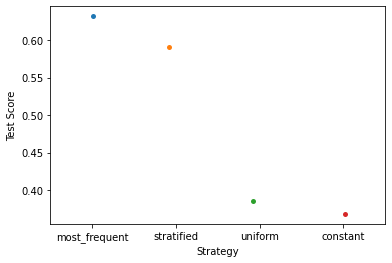

In [ ]:
import seaborn as sns
ax = sns.stripplot(strategies, test_scores);
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()

In [ ]:
#Import svm package from sklearn
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=1e-0, gamma=1e-3) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.91      0.94      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## Evaluate the performance of our model - Confusion Matrix

In [ ]:
dataset.diagnosis[dataset.diagnosis == 'M'] = 1
dataset.diagnosis[dataset.diagnosis == 'B'] = 0

ax = sns.heatmap(dataset)